In [118]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import imodelsx.process_results
import sys
from sklearn.metrics import accuracy_score

# def load_csvs(path):

#     X_train = pd.read_csv(f'{path}/X_trainval.csv', index_col=0)
#     X_train_hat = pd.read_csv(f'{path}/X_trainval_hat.csv', index_col=0)
#     X_test = pd.read_csv(f'{path}/X_test.csv', index_col=0)
#     X_test_hat = pd.read_csv(f'{path}/X_test_hat.csv', index_col=0)
#     y_train = pd.read_csv(f'{path}/y_trainval.csv', index_col=0)
#     y_train_hat = pd.read_csv(f'{path}/y_trainval_hat.csv', index_col=0)
#     y_test = pd.read_csv(f'{path}/y_test.csv', index_col=0)
#     y_test_hat = pd.read_csv(f'{path}/y_test_hat.csv', index_col=0)

#     return X_train, X_train_hat, X_test, X_test_hat, y_train, y_train_hat, y_test, y_test_hat

sys.path.append('../experiments/')
results = []

results_dir = f'../results/mold'
experiment_filename = '../experiments/cub_distillation_edit.py'

# load the results in to a pandas dataframe
r = imodelsx.process_results.get_results_df(results_dir)
cols_varied = imodelsx.process_results.get_experiment_keys(
    r, experiment_filename)
print('experiment varied these params:', cols_varied)
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

# get the breakdown of data in these groups
r.groupby(cols_varied).size()

100%|█████████████████████████████████████████| 76/76 [00:00<00:00, 1004.91it/s]

experiment varied these params: ['max_rules', 'max_trees', 'max_depth']


max_rules  max_trees  max_depth
30         15         2            1
                      3            1
                      4            1
                      5            1
           20         2            1
                                  ..
120        20         5            1
           30         2            1
                      3            1
                      4            1
                      5            1
Length: 76, dtype: int64

In [119]:
#performance
r['mean_cbm_true_accuracy_trainval'] = np.mean([r[f'cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_cbm_true_accuracy_trainval'] = np.std([r[f'cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_cbm_true_accuracy_test'] = np.mean([r[f'cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_cbm_true_accuracy_test'] = np.std([r[f'cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_distiller_true_accuracy_trainval'] = np.mean([r[f'distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_distiller_true_accuracy_trainval'] = np.std([r[f'distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_distiller_true_accuracy_test'] = np.mean([r[f'distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_distiller_true_accuracy_test'] = np.std([r[f'distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_distiller_cbm_accuracy_trainval'] = np.mean([r[f'distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_distiller_cbm_accuracy_trainval'] = np.std([r[f'distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_distiller_cbm_accuracy_test'] = np.mean([r[f'distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_distiller_cbm_accuracy_test'] = np.std([r[f'distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

#correct overlap

r['mean_%_correct_overlap_trainval'] = np.mean([r[f'%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['std_%_correct_overlap_trainval'] = np.std([r[f'%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_%_correct_overlap_test'] = np.mean([r[f'%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)
r['std_%_correct_overlap_test'] = np.std([r[f'%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)

#edited performance

r['mean_edited_cbm_true_accuracy_trainval'] = np.mean([r[f'edited_cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_cbm_true_accuracy_trainval'] = np.std([r[f'edited_cbm_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_cbm_true_accuracy_test'] = np.mean([r[f'edited_cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_cbm_true_accuracy_test'] = np.std([r[f'edited_cbm_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_edited_distiller_true_accuracy_trainval'] = np.mean([r[f'edited_distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_true_accuracy_trainval'] = np.std([r[f'edited_distiller_true_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_distiller_true_accuracy_test'] = np.mean([r[f'edited_distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_true_accuracy_test'] = np.std([r[f'edited_distiller_true_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

r['mean_edited_distiller_cbm_accuracy_trainval'] = np.mean([r[f'edited_distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_cbm_accuracy_trainval'] = np.std([r[f'edited_distiller_cbm_seed{seed}_accuracy_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_distiller_cbm_accuracy_test'] = np.mean([r[f'edited_distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_distiller_cbm_accuracy_test'] = np.std([r[f'edited_distiller_cbm_seed{seed}_accuracy_test'] for seed in range(1, 4)], axis = 0)

#edited correct overlap

r['mean_edited_%_correct_overlap_trainval'] = np.mean([r[f'edited_%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['std_edited_%_correct_overlap_trainval'] = np.std([r[f'edited_%_correct_seed{seed}_overlap_trainval'] for seed in range(1, 4)], axis = 0)
r['mean_edited_%_correct_overlap_test'] = np.mean([r[f'edited_%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)
r['std_edited_%_correct_overlap_test'] = np.std([r[f'edited_%_correct_seed{seed}_overlap_test'] for seed in range(1, 4)], axis = 0)

In [120]:
r = r.drop(columns  = ['save_dir', 'save_dir_unique', 'use_cache', 'device']
      +['cbm_true_seed1_accuracy_trainval', 'cbm_true_seed1_accuracy_test',
       'distiller_true_seed1_accuracy_trainval',
       'distiller_true_seed1_accuracy_test',
       'distiller_cbm_seed1_accuracy_trainval',
       'distiller_cbm_seed1_accuracy_test', '%_correct_seed1_overlap_trainval',
       '%_correct_seed1_overlap_test',
       'edited_cbm_true_seed1_accuracy_trainval',
       'edited_cbm_true_seed1_accuracy_test',
       'edited_distiller_true_seed1_accuracy_trainval',
       'edited_distiller_true_seed1_accuracy_test',
       'edited_distiller_cbm_seed1_accuracy_trainval',
       'edited_distiller_cbm_seed1_accuracy_test',
       'edited_%_correct_seed1_overlap_trainval',
       'edited_%_correct_seed1_overlap_test',
       'cbm_true_seed2_accuracy_trainval', 'cbm_true_seed2_accuracy_test',
       'distiller_true_seed2_accuracy_trainval',
       'distiller_true_seed2_accuracy_test',
       'distiller_cbm_seed2_accuracy_trainval',
       'distiller_cbm_seed2_accuracy_test', '%_correct_seed2_overlap_trainval',
       '%_correct_seed2_overlap_test',
       'edited_cbm_true_seed2_accuracy_trainval',
       'edited_cbm_true_seed2_accuracy_test',
       'edited_distiller_true_seed2_accuracy_trainval',
       'edited_distiller_true_seed2_accuracy_test',
       'edited_distiller_cbm_seed2_accuracy_trainval',
       'edited_distiller_cbm_seed2_accuracy_test',
       'edited_%_correct_seed2_overlap_trainval',
       'edited_%_correct_seed2_overlap_test',
       'cbm_true_seed3_accuracy_trainval', 'cbm_true_seed3_accuracy_test',
       'distiller_true_seed3_accuracy_trainval',
       'distiller_true_seed3_accuracy_test',
       'distiller_cbm_seed3_accuracy_trainval',
       'distiller_cbm_seed3_accuracy_test', '%_correct_seed3_overlap_trainval',
       '%_correct_seed3_overlap_test',
       'edited_cbm_true_seed3_accuracy_trainval',
       'edited_cbm_true_seed3_accuracy_test',
       'edited_distiller_true_seed3_accuracy_trainval',
       'edited_distiller_true_seed3_accuracy_test',
       'edited_distiller_cbm_seed3_accuracy_trainval',
       'edited_distiller_cbm_seed3_accuracy_test',
       'edited_%_correct_seed3_overlap_trainval',
       'edited_%_correct_seed3_overlap_test'])

In [121]:
r.loc[(r.X_type == 'binary') & (r.thresh == 0), 'X_type'] = 'F1'

In [127]:
r[['max_depth', 'max_trees', 'max_rules', 'mean_edited_distiller_true_accuracy_test']].sort_values('mean_edited_distiller_true_accuracy_test', ascending=False)[(r.max_trees <30)] #.mean_edited_distiler_true_accuracy_test #.mean_distiller_true_accuracy_test #.mean_edited_cbm_true_accuracy_test

/tmp/ipykernel_2311/3145469162.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r[['max_depth', 'max_trees', 'max_rules', 'mean_edited_distiller_true_accuracy_test']].sort_values('mean_edited_distiller_true_accuracy_test', ascending=False)[(r.max_trees <30)] #.mean_edited_distiler_true_accuracy_test #.mean_distiller_true_accuracy_test #.mean_edited_cbm_true_accuracy_test


,max_depth,max_trees,max_rules,mean_edited_distiller_true_accuracy_test
34,4,20,120,0.807617
53,4,20,100,0.804050
33,5,20,120,0.804050
60,4,20,90,0.802094
51,5,20,100,0.801346
2,5,15,120,0.801059
16,5,15,100,0.800713
68,5,20,90,0.799448
47,4,15,100,0.798470
69,5,15,90,0.798067


In [104]:
np.sum(np.arange(200)*np.arange(199, -1, -1)), np.sum(np.arange(200)*np.arange(200))

(1313400, 2646700)

In [68]:
cluster_plotting = r[r.concepts_to_edit == 'random_clusters']
cluster_plotting.sort_values('mean_distiller_true_accuracy_test', ascending=False).mean_distiller_true_accuracy_test #.mean_edited_distiler_true_accuracy_test

25    0.766828
21    0.766483
1     0.766425
26    0.765907
22    0.765850
19    0.765044
17    0.763951
8     0.763721
34    0.762916
30    0.762570
13    0.762110
31    0.761880
20    0.757278
24    0.757278
14    0.753135
15    0.753135
3     0.753135
9     0.741169
16    0.739328
29    0.738580
0     0.735243
10    0.733748
33    0.732942
5     0.732885
4     0.732885
23    0.731676
11    0.731101
35    0.730698
28    0.725060
27    0.725060
32    0.725060
2     0.725060
7     0.661949
6     0.661949
18    0.661949
12    0.657289
Name: mean_distiller_true_accuracy_test, dtype: float64

In [10]:
r.drop(columns = ['max_rules', ])

,task_type,model_name,X_type,thresh,Y_type,max_trees,max_depth,pre_interaction,pre_max_features,post_interaction,...,mean_edited_distiller_true_accuracy_test,std_edited_distiller_true_accuracy_test,mean_edited_distiller_cbm_accuracy_trainval,std_edited_distiller_cbm_accuracy_trainval,mean_edited_distiller_cbm_accuracy_test,std_edited_distiller_cbm_accuracy_test,mean_edited_%_correct_overlap_trainval,std_edited_%_correct_overlap_trainval,mean_edited_%_correct_overlap_test,std_edited_%_correct_overlap_test
0,regression,FIGSRegressor,binary,0.45,logits,30,4,l0l2,25.0,l0l2,...,0.803993,0.002615,0.983066,0.005570,0.904614,0.010219,0.984904,0.005187,0.935623,0.009586
1,regression,FIGSRegressor,binary,0.45,logits,30,5,l0l2,25.0,l0l2,...,0.803935,0.004244,0.983400,0.002349,0.905247,0.006416,0.985238,0.000417,0.935450,0.006695
2,regression,FIGSRegressor,binary,0.45,logits,30,2,l0l2,25.0,l0l2,...,0.804741,0.002896,0.982899,0.004277,0.901622,0.002445,0.984904,0.002532,0.933840,0.000895


In [13]:
def plot_grouped_accuracy_barchart(data, x_type_col, train_col, test_col, title):
    """
    Plots a grouped bar chart of train and test accuracy grouped by X_type.

    Parameters:
        data (pd.DataFrame): DataFrame containing the data.
        x_type_col (str): Name of the column representing X_type groups.
        train_col (str): Name of the column representing train accuracy.
        test_col (str): Name of the column representing test accuracy.
    """
    # Calculate mean accuracy for each X_type group
    grouped_data = data.groupby(x_type_col).agg({train_col: 'mean', test_col: 'mean'}).reset_index()

    # Extract values for plotting
    x_types = grouped_data[x_type_col]
    train_acc = grouped_data[train_col]
    test_acc = grouped_data[test_col]
    
    # Define bar positions
    bar_width = 0.35
    x = range(len(x_types))
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x, train_acc, width=bar_width, label='Train Accuracy', alpha=0.7, color='blue', edgecolor='black')
    plt.bar([p + bar_width for p in x], test_acc, width=bar_width, label='Test Accuracy', alpha=0.7, color='orange', edgecolor='black')
    
    # Add labels, title, and legend
    plt.xlabel("X_type", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks([p + bar_width / 2 for p in x], x_types, fontsize=12, rotation=45)
    plt.legend(fontsize=12, title="Legend", title_fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.savefig(f'../figures/{title}.png')

# Example usage
# Assuming you have a DataFrame `df` with columns "X_type", "train_accuracy", "test_accuracy"
# plot_grouped_accuracy_barchart(df, "X_type", "train_accuracy", "test_accuracy")


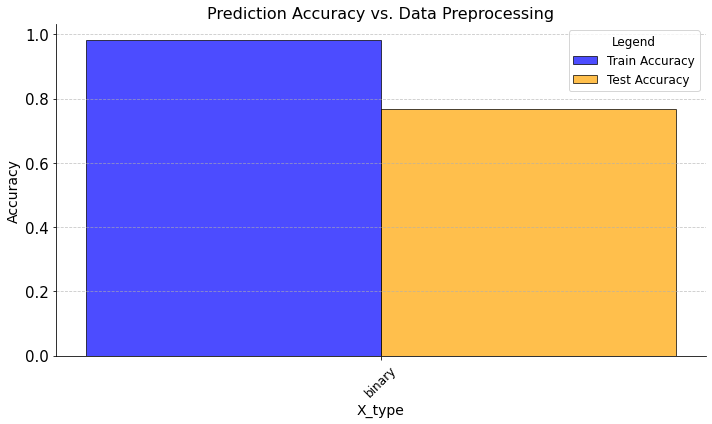

In [14]:
plot_grouped_accuracy_barchart(cluster_plotting, 'X_type', 'mean_distiller_true_accuracy_trainval', 'mean_distiller_true_accuracy_test', "Prediction Accuracy vs. Data Preprocessing")

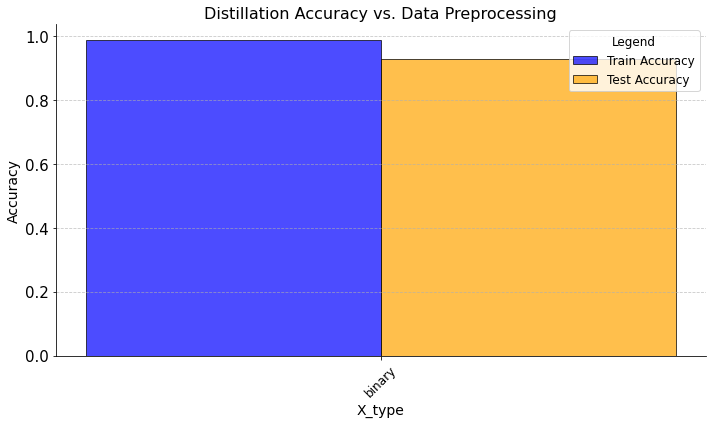

In [15]:
plot_grouped_accuracy_barchart(cluster_plotting, 'X_type', 'mean_distiller_cbm_accuracy_trainval', 'mean_distiller_cbm_accuracy_test', "Distillation Accuracy vs. Data Preprocessing")

In [16]:
def plot_model_editing_barchart(data, x_type_col, orig_col, group_col, indep_col, title):
    """
    Plots a grouped bar chart of train and test accuracy grouped by X_type.

    Parameters:
        data (pd.DataFrame): DataFrame containing the data.
        x_type_col (str): Name of the column representing X_type groups.
        train_col (str): Name of the column representing train accuracy.
        test_col (str): Name of the column representing test accuracy.
    """
    # Calculate mean accuracy for each X_type group
    grouped_cluster_data = data[data.concepts_to_edit=='random_clusters']#.groupby(x_type_col).agg({train_col: 'mean', test_col: 'mean'}).reset_index()
    grouped_indep_data = data[data.concepts_to_edit=='random_independent']#.groupby(x_type_col).agg({train_col: 'mean', test_col: 'mean'}).reset_index()
    # Extract values for plotting
    grouped_cluster_data = grouped_cluster_data[[x_type_col, orig_col, group_col]]
    grouped_cluster_data['group_' + group_col] = grouped_cluster_data[group_col]
    grouped_indep_data = grouped_indep_data[[x_type_col, orig_col, indep_col]]
    grouped_indep_data['indep_' + group_col] = grouped_indep_data[indep_col]
    
    grouped_data = pd.merge(grouped_cluster_data, grouped_indep_data, on=x_type_col)
    #return grouped_data
    grouped_data = grouped_data.sort_values('X_type', ascending=True)
    x_types = grouped_data[x_type_col]
    orig_acc = grouped_data[orig_col+'_x']
    group_acc = grouped_data['group_' + group_col]
    indep_acc = grouped_data['indep_' + indep_col]
    
    # Define bar positions
    bar_width = 0.2
    x = range(len(x_types))
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x, orig_acc, width=bar_width, label='Original Accuracy', alpha=0.7, color='blue', edgecolor='black')
    plt.bar([p + bar_width for p in x], group_acc, width=bar_width, label='Group Edited Accuracy', alpha=0.7, color='orange', edgecolor='black')
    plt.bar([p + bar_width*2 for p in x], indep_acc, width=bar_width, label='Independent Edited Accuracy', alpha=0.7, color='red', edgecolor='black')
    
    # Add labels, title, and legend
    plt.xlabel("X_type", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks([p + bar_width / 2 for p in x], x_types, fontsize=12, rotation=45)
    plt.ylim(0, 1)
    plt.legend(fontsize=12, title="Legend", title_fontsize=12, loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.show()
    #plt.savefig(f'../figures/{title}.png')

# Example usage
# Assuming you have a DataFrame `df` with columns "X_type", "train_accuracy", "test_accuracy"
# plot_grouped_accuracy_barchart(df, "X_type", "train_accuracy", "test_accuracy")


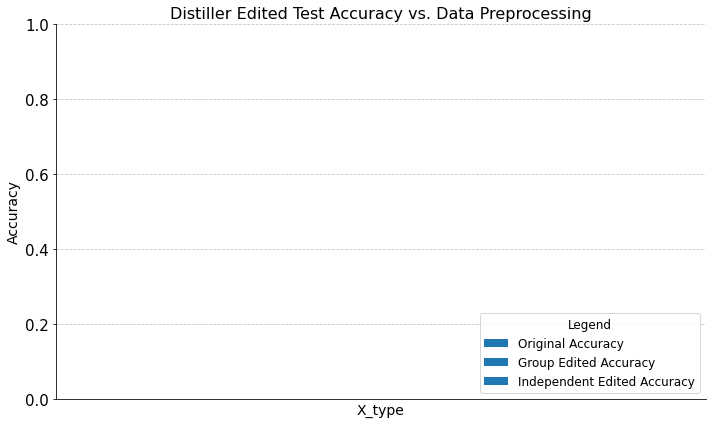

In [17]:
plot_model_editing_barchart(r, 'X_type', 'mean_distiller_true_accuracy_test', 'mean_edited_distiller_true_accuracy_test', 'mean_edited_distiller_true_accuracy_test', "Distiller Edited Test Accuracy vs. Data Preprocessing")

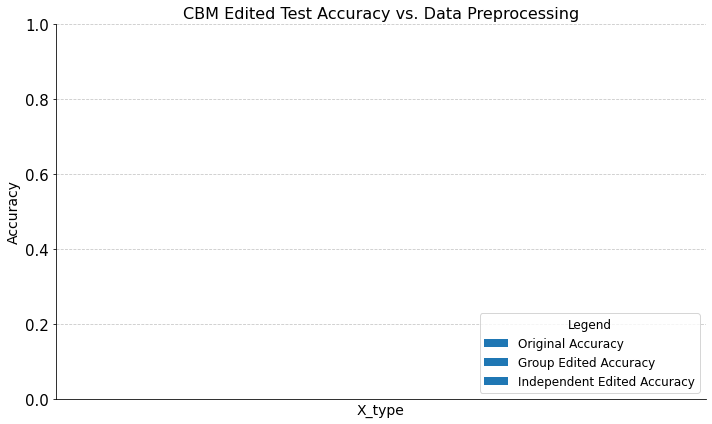

In [18]:
plot_model_editing_barchart(r, 'X_type', 'mean_cbm_true_accuracy_test', 'mean_edited_cbm_true_accuracy_test', 'mean_edited_cbm_true_accuracy_test', "CBM Edited Test Accuracy vs. Data Preprocessing")



In [20]:
r[['X_type', 'concepts_to_edit', 'mean_distiller_true_accuracy_test', 'mean_edited_distiller_true_accuracy_test']]

,X_type,concepts_to_edit,mean_distiller_true_accuracy_test,mean_edited_distiller_true_accuracy_test
0,binary,random_clusters,0.766425,0.803993
1,binary,random_clusters,0.765850,0.803935
2,binary,random_clusters,0.766828,0.804741


In [ ]:
r[['model_name','mean_distiller_cbm_accuracy_trainval', 'mean_edited_distiller_cbm_accuracy_trainval', 'mean_distiller_cbm_accuracy_test', 'mean_edited_distiller_cbm_accuracy_test']]

In [ ]:
r[['model_name','mean_cbm_true_accuracy_trainval', 'mean_edited_cbm_true_accuracy_trainval', 'mean_distiller_true_accuracy_trainval', 'mean_edited_distiller_true_accuracy_trainval',]]

In [ ]:
r[['model_name', 'mean_%_correct_overlap_trainval', 'mean_%_correct_overlap_test', 'mean_edited_%_correct_overlap_trainval', 'mean_edited_%_correct_overlap_test']]